# Gradient Descent

In [1]:
using PyPlot
using NtToolBox
using Autoreload
arequire("NtToolBox")

  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:1
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:1
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:7
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:7
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:12
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  like

$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\pa}[1]{\left(#1\right)}$

We consider the problem of finding a minimizer of a convex smooth function $\;f : \RR^d \rightarrow \RR$; that is, we want to solve
$$\umin{x \in \RR^d} f(x)$$

Note that the minimizer is not necessarily unique.

The simplest method is gradient descent, which  iteratively computes
$$ x^{(k+1)} = x^{(k)} - \tau \nabla f(x^{(k)}), $$
where $\nabla f(x) \in \RR^d$ is the gradient of $f$ at $x$, $x^{(0)} \in \RR^d$ is an arbitrary initial point, and the stepsize $\tau$ must satisfy 
$$0<\tau<2/\beta,$$
to have convergence, where $\beta$ is a Lipschitz constant of $\nabla f$; that is, 
$$ \forall (x,x') \in \RR^N \times \RR^N, \quad
      \norm{\nabla f(x) - \nabla f(x')} \leq \beta \norm{x-x'}.  $$

For instance, if $f$ is of class $C^2$, $$\beta= \sup_x \norm{Hf(x)},$$
where $Hf(x) \in \RR^{d \times d}$ is the Hessian of $f$ at $x$ and $\norm{\cdot}$ is the spectral operator norm (largest eigenvalue). 

## Gradient descent in 2-D

We consider a simple problem, corresponding to the minimization of a 2-D ($d=2$) quadratic form
$$ f(x) = \frac{1}{2} \pa{ x_1^2 + \eta x_2^2 } ,$$
where $\eta>0$ controls the anisotropy, and hence the difficulty, of the problem.

We can note that minimizing a strongly convex quadratic function is equivalent to solving a positive definite linear system. Gradient descent is then equivalent to the Richardson iteration applied to this linear system.

We define the anisotropy parameter $\eta$:

In [2]:
eta = 8

  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31

8

, use String instead.
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31


We define the function $f$:

In [3]:
f = x -> (x[1]^2 + eta*x[2]^2) / 2

(::#1) (generic function with 1 method)

<font color='blue'>Note: a 'lambda' function is a one-line function definition; 
in Matlab, this would be `f=@(x)(x(1)^2+eta*x(2)^2)/2;`

An example of function evaluation:

In [4]:
f([2,3])

38.0

We display the function using a contourplot:

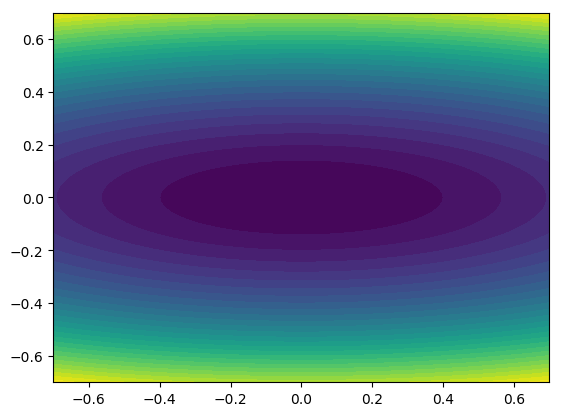

PyObject <matplotlib.contour.QuadContourSet object at 0x000000001D506D68>

In [5]:
include("ndgrid.jl")
t = linspace(-.7,.7,101)
(u, v) = meshgrid(t,t)
F = (u.^2 + eta.*v.^2) ./ 2
contourf(t, t, F, 35)

We define the gradient of $f$:

In [6]:
Grad_f = x -> [x[1]; eta*x[2]]

(::#5) (generic function with 1 method)

An example of evaluation:

In [7]:
Grad_f([1,2])

2-element Array{Int64,1}:
  1
 16

Since $f$ is quadratic, its Hessian is the constant matrix $\left(\begin{array}{cc}1&0\\0&\eta\end{array}\right)$. Its spectral norm, which is the Lipschitz constant of `Grad_f`, is $\beta=\max(1,\eta)$. 

The stepsize $\tau$ must satisfy $0< \tau < 2/\beta$.

In [8]:
tau = 1.8/max(eta,1); tau

0.225

Now we implement the gradient descent method: given the initial estimate $x^{(0)}$ of the solution, the stepsize $\tau$ and the number $k$ of iterations, we compute $x^{(k)}$:

In [9]:
nbiter = 10
x = [1, 1]  # initial estimate of the solution
for iter in 1:nbiter  # iter goes from 1 to nbiter
    x = x - tau.*Grad_f(x)
end
x   # to display x, like in Matlab. Use print(x) if this is not the last command of the cell, else nothing is displayed

2-element Array{Float64,1}:
 0.0781658
 0.107374 

In [10]:
f(_) # _ is the current variable, like Matlab's ans # to check # For later.

LoadError: UndefVarError: _ not defined

We encapsulate the code in a function called `GradientDescent`.

In [10]:
function GradDescent(Grad_f, x0, nbiter, tau)
    x = x0
    for iter in 1:nbiter  # iter goes from 1 to nbiter
        x = x - tau.*Grad_f(x)   # x has type 'array'. Like in C, one can also write x-=tau*Grad_f(x)
    end
    return x
end

GradDescent (generic function with 1 method)

In [11]:
GradDescent(Grad_f, [1, 1], 10, tau)

2-element Array{Float64,1}:
 0.0781658
 0.107374 

We define a function called `GradDescentArray` which puts the iterates in a 'matrix' (a 2-D array in fact); they are first put in a list and the list is converted to an array at the end <font color='blue'>(the + operation on lists concatenates them, whereas on arrays this is the classical elementwise addition).</font>

In [12]:
function GradDescentArray(Grad_f, x0, nbiter, tau)
    x = x0
    xlist = [x0[1] x0[2]]  
    for iter in 1:nbiter
        x = x - tau*Grad_f(x)     
        xlist = [xlist; [x[1] x[2]]]
    end
    return xlist
end

GradDescentArray (generic function with 1 method)

In [13]:
xarray = GradDescentArray(Grad_f,[0.6,0.6],10,0.225)
xarray

11×2 Array{Float64,2}:
 0.6         0.6      
 0.465      -0.48     
 0.360375    0.384    
 0.279291   -0.3072   
 0.21645     0.24576  
 0.167749   -0.196608 
 0.130005    0.157286 
 0.100754   -0.125829 
 0.0780845   0.100663 
 0.0605155  -0.0805306
 0.0468995   0.0644245

<font color='blue'>We can access the elements of an array like in Matlab. Be careful: like in C, the first element has index 0! Some examples:</font>

In [14]:
xarray[2, 1]

0.46499999999999997

In [15]:
xarray[2, :]

2-element Array{Float64,1}:
  0.465
 -0.48 

In [16]:
xarray[:, 1]

11-element Array{Float64,1}:
 0.6      
 0.465    
 0.360375 
 0.279291 
 0.21645  
 0.167749 
 0.130005 
 0.100754 
 0.0780845
 0.0605155
 0.0468995

<font color='blue'>We can apply the function $f$ to every iterate $x^{(k)}$ of the list `xarray`, using the command `map`:</font>

In [17]:
mapslices(f, xarray, 2)

11×1 Array{Float64,2}:
 1.62     
 1.02971  
 0.654759 
 0.416489 
 0.265017 
 0.168689 
 0.107407 
 0.0684076
 0.043581 
 0.0277718
 0.0177019

We plot the cost function $f(x^{(k)})$ as a function of $k$, in log-scale:

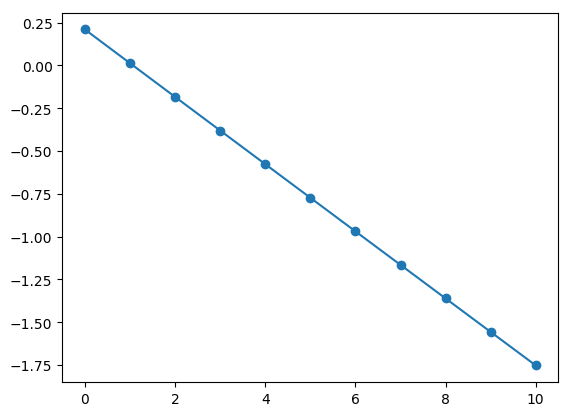

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001D3E7CC0>

In [18]:
plot(0:size(xarray)[1] - 1, log10(mapslices(f, xarray, 2)), "o-")

We remark that because the function $f$ is strongly convex, the convergence is linear. Also, we can note that gradient descent is monotonic:  $f(x^{(k)})$ is decreased at every iteration.

We plot the iterates above the contourplot of $f$:

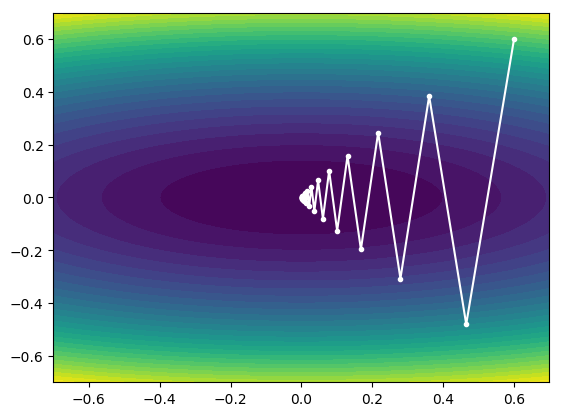

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001D7D0F98>

In [19]:
contourf(t, t, F, 35)
xarray = GradDescentArray(Grad_f, [0.6, 0.6], 30, 0.225)
plot(xarray[:, 1], xarray[:, 2], "w.-")

 <h3>
 <font color='magenta'>
__Exercise: re-run the previous cells with different values of tau 
(try 0.25,0.225,0.2,0.125,0.05).__</font></h3>

<h3><font color='magenta'>__Also try different initial estimates.__</font></h3>

<h3><font color='magenta'>__Also try different values of the anisotropy eta__.
</font></h3>

## Gradient descent in large dimension: image restoration

Local differential operators like the discrete gradient are fundamental for variational image processing.

We load the image Lena in the array $x^\sharp$ (we choose the symbol # - 'sharp', because the image is clean, not degraded).

In [20]:
name = "NtToolBox/src/data/lena.png"
xsharp = load_image(name)
println(size(xsharp))
println(@sprintf("The size of the image is %s x %s.", size(xsharp)[1], size(xsharp)[2]))
println(@sprintf("The range of the pixel values is [%s, %s].", minimum(xsharp), maximum(xsharp))) # the range of the pixel values is [0.0, 1.0] because load_image scales the image.

(512,512)
The size of the image is 512 x 512.
The range of the pixel values is [0.0, 1.0].


We display the image.

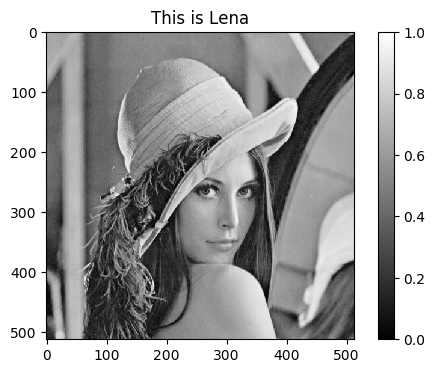

PyObject <matplotlib.text.Text object at 0x0000000026ABD4A8>

In [25]:
# imageplot(xsharp)
# figsize(11, 11)
imshow(xsharp, interpolation = "nearest")
set_cmap("gray")
colorbar()       # displays the color bar close to the image
subplots_adjust(top = 0.75)
title("This is Lena")

We define the 'discrete gradient' $D$, which is the linear operator which maps an image to an image whose values are pairs of vertical and horizontal  finite differences:

$$(D x)_{n_1,n_2} = \big((D x)_{n_1,n_2,v},(D x)_{n_1,n_2,h}\big)=( x_{n_1+1,n_2}-x_{n_1,n_2}, x_{n_1,n_2+1}-x_{n_1,n_2} ) \in \RR^2,$$
where $n_1$ and $n_2$ are the row and column numbers, respectively (the origin $n_1=n_2=0$ corresponds to the pixel at the top left corner) and where Neumann boundary conditions are assumed: a difference accross the boundary is zero.

Let us define the operator $D$ as a function:

In [26]:
function D(x)
    vdiff = x - [x[end, :]'; x[1:end-1, :]] # the r_ command concatenates along the rows
    hdiff = x - [x[:, end] x[:,1:end-1]] # the c_ command concatenates along the columns
    return cat(3, vdiff, hdiff) # combination along a third dimension
end
# An alternative, more compact, definition:
#D = lambda x : c_['2,3',r_[diff(x,1,0), zeros([1,x.shape[1]])],c_[diff(x,1,1), zeros([x.shape[0],1])]]

D (generic function with 1 method)

In [27]:
v = D(xsharp)

512×512×2 Array{Float32,3}:
[:, :, 1] =
  0.556075     0.556075     0.495327    …   0.219626     0.0887851 
  0.0          0.0          0.0             0.0          0.0       
  0.0          0.0          0.0             0.0          0.0       
  0.0          0.0          0.0             0.0          0.0       
  0.0          0.0          0.0             0.0          0.0       
  0.00934571   0.00934571  -0.0140188   …  -0.228972    -0.23676   
 -0.0140187   -0.0140187    0.0186916      -0.191589    -0.0950156 
 -0.00467294  -0.00467294  -0.0327103      -0.046729    -0.0607477 
 -0.0186915   -0.0186915    0.0140187      -0.0420561    0.00934583
  0.0          0.0         -0.00467294     -0.00934578  -0.0280374 
  0.00467288   0.00467288  -0.00467283  …   0.0280374    0.0373832 
  0.0          0.0          0.0            -0.0327103   -0.0140187 
  0.00934577   0.00934577   0.00467283      0.0186916    0.0093458 
  ⋮                                     ⋱   ⋮                      
 -0.0046

We display the two components as two grayscale images.

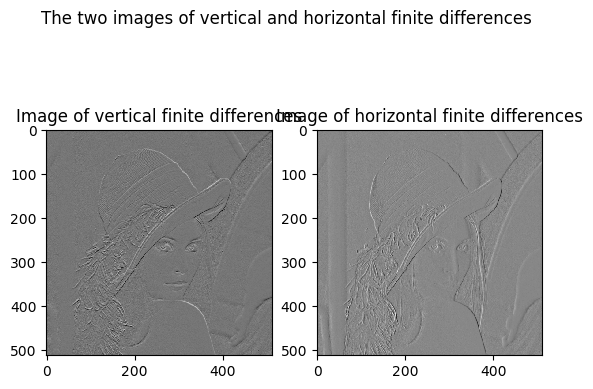

PyObject <matplotlib.text.Text object at 0x000000002733FDA0>

In [39]:
fig, (axv,axh) = subplots(1, 2) #figsize(16, 7) # one figure with two horizontal subfigures # I don't know why figsize does not work here.
suptitle("The two images of vertical and horizontal finite differences")
imv = axv[:imshow](v[:, :, 1])
set_cmap("gray")
imh = axh[:imshow](v[:, :, 2])
set_cmap("gray")
axv[:set_title]("Image of vertical finite differences")
axh[:set_title]("Image of horizontal finite differences")
# dividerv = make_axes_locatable(axv)
# caxv = dividerv.append_axes("right", size="7%", pad=0.1)
# colorbar(imv, cax = caxv)
# dividerh = make_axes_locatable(axh)
# caxh = dividerh.append_axes("right", size="7%", pad=0.1)
# colorbar(imh,cax=caxh)

Let us display the image of the magnitudes $\norm{(D x)_{n_1,n_2}}$, which are large near edges.

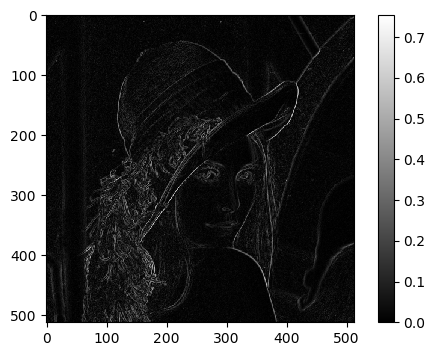

In [40]:
imshow(sqrt(sum(v.^2, 3)[:, :]))
colorbar()      
subplots_adjust(top = 0.75)


We remark that the gradient magnitude is close to zero at most pixels. 

Imaging inverse problems consist in estimating an unknown image $x^\sharp$, having at our disposal only the data $y$, which contains partial degraded information about $x^\sharp$: we have the forward model
$$y=Ax^\sharp\ +\mbox{ noise}$$
where $A$ is a known linear observation/degradation operator. $A$ is not invertible in general, which makes the problem ill-posed. So, one must inject some prior information modeling what a natural image is, to regularize the problem and make it well-posed. Maybe the simplest prior one can use is that natural images are smooth; that is, their gradient has low energy (like for the Lena image above). This yields Tikhonov regularization: $x^\sharp$ is estimated by $x^\star$, which is a solution to 
$$\umin{x \in \RR^d} f(x)$$
where 
$$f(x)=\frac{1}{2}\|Ax-y\|^2+\frac{\lambda}{2}\|Dx\|^2_{2,2},$$
with $\|Dx\|^2_{2,2}=\sum_{n_1,n_2} \|(Dx)_{n_1,n_2}\|^2_2=\sum_{n_1,n_2} (Dx)_{n_1,n_2,v}^2+(Dx)_{n_1,n_2,h}^2$
and some regularization parameter $\lambda$, which depends on the noise level.

Here again, the function $f$ to minimize is smooth (it is quadratic) and we can use gradient descent. We have:
$$\nabla f(x)=A^*(Ax-y)+\lambda D^*Dx=(A^*A+\lambda D^*D)x-A^*y.$$

So, to compute $\nabla f(x)$ for some image $x$, we must be able to apply the operator $A^*A$, where $A^*$ is the adjoint of $A$, and $D^*D$. For this, let us define $D^*$ as a function:

In [27]:
Dadj = v -> r_['0,2',-v[0,:,0],-diff(v[:-1,:,0],1,0),v[-2,:,0]] + c_['1,2',-v[:,0,1],-diff(v[:,:-1,1],1,1),v[:,-2,1]]

LoadError: syntax: invalid character literal

$D^*$ can be viewed as the opposite of a discrete divergence operator. Hence, $D^*\circ D$ can be viewed as the opposite of a discrete Laplacian operator. In fact, $D^*\circ D$ amounts to convolving the image with the filter $\left(\begin{array}{ccc}0&-1&0\\-1&4&-1\\0&-1&0\end{array}\right)$, with symmetric boundary conditions. 

So, $D^*\circ D$ could be implemented more efficiently than here, but this is not the point, and we will need $D$ and $D^*$ separately later, for the total variation.

We check the relation $\norm{D x}^2 - \dotp{D^*Dx}{x}=0.$

In [34]:
(D(xsharp)**2).sum() - (Dadj(D(xsharp))*xsharp).sum()

0.0

##Image Denoising

We consider the problem of denoising the image $y \in \RR^{N_1\times N_2}$, which corresponds to the problem above with $A$ the Identity operator. So we want to solve $$\umin{x \in \RR^d} f(x)$$
where 
$$f(x)=\frac{1}{2}\|x-y\|^2+\frac{\lambda}{2}\|Dx\|^2_{2,2}.$$
Note we are now looking for an unknown $x$ which lives in a Hilbert space of dimension $d=N_1.N_2$, the number of pixels of the image; for Lena, $d=512^2=262144$, hence the term 'large-scale optimization'.

We add noise to the original image $x^\sharp$, to simulate the noisy image $y$.

In [35]:
(N1,N2) = shape(xsharp)
noiselevel = 20
y = xsharp + noiselevel * randn(N1,N2)

We display the noisy image $y$.

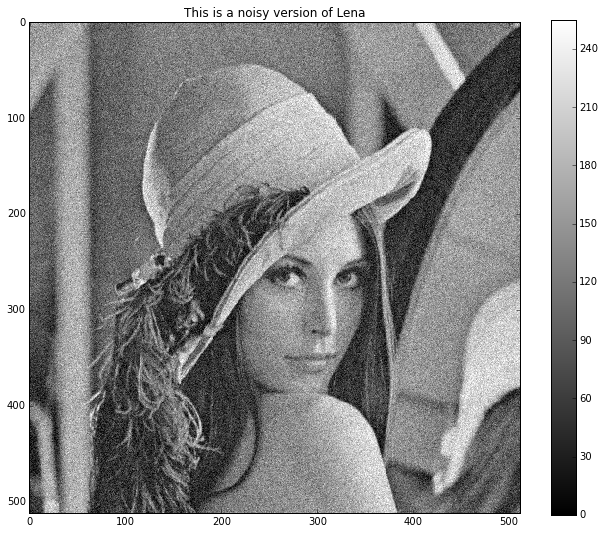

In [36]:
figsize(11,11)
imshow(y, interpolation='nearest', cmap=cm.gray, vmin=0, vmax=255)
colorbar()       
subplots_adjust(top=0.75)
title('This is a noisy version of Lena')

We define the gradient of $f$ as a function.

<h3>
 <font color='magenta'>
__Exercise: write the code of the function Grad_f.__</font></h3>

In [37]:
def Grad_f(x, y, Lambda):
    # put your code here.

The Lipschitz constant $\beta$ of $\nabla f$ is $\|Id+\lambda D^*D\|=1+8\lambda$.

<h3>
 <font color='magenta'>
__Exercise: write the code of the function GradDescent.__</font></h3>

In [5]:
def GradDescent(Grad_f, y, Lambda, x0, nbiter, tau):
    # put your code here.

In [39]:
Lambda = 8; xdenoised = GradDescent(Grad_f, y, Lambda, y, 100, 1.9/(1+8*Lambda))

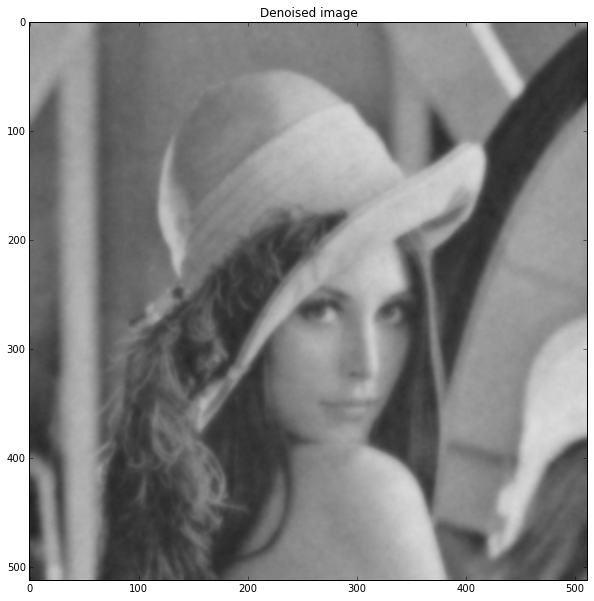

In [40]:
figsize(10,10)
imshow(xdenoised, cmap=cm.gray, vmin=0, vmax=255)
title('Denoised image')

We can note that this denoising process is linear: the denoised image $\tilde{x}$ obtained at convergence satisfies 
$$\nabla f (\tilde{x})=0\ \Leftrightarrow\ \tilde{x}=(\mathrm{Id}+\lambda D^*D)^{-1}y.$$

As a result, we can see that the noise is attenuated, but the image is blurry: its fine details have been lost. So, this denoising process has bad performances. Good denoising processes are nonlinear. We will see in the next lab that using the total variation instead of Tikhonov regularization is much better.

## Projected Gradient Descent

Often, one wants to minimize a smooth convex cost function, but with the additional constraint that the solution lies in some closed convex subset $\Omega$; that is, one wants to solve
$$\umin{x \in \Omega} f(x)\quad\equiv\quad\umin{x \in \RR^d} f(x)\quad\mbox{s.t.}\quad x\in\Omega$$

A natural extension  of gradient descent is then _projected gradient descent_, which  iteratively computes
$$ x^{(k+1)} = P_\Omega\big(x^{(k)} - \tau \nabla f(x^{(k)})\big), $$

where $P_\Omega$ is orthogonal projection onto $\Omega$.

Here also, convergence of the iterates $x^{(k)}$ to a solution $x^\star$ is guaranteed, provided that $0<\tau<2/\beta$.


## Image Inpainting by Projected Gradient Descent


We now consider inpainting; that is, reconstructing missing pixel values from a subset of available pixels. 

We keep about 10% of the pixels at random, the other ones are missing.

In [41]:
mask = rand(xsharp.shape[0],xsharp.shape[1])>0.9

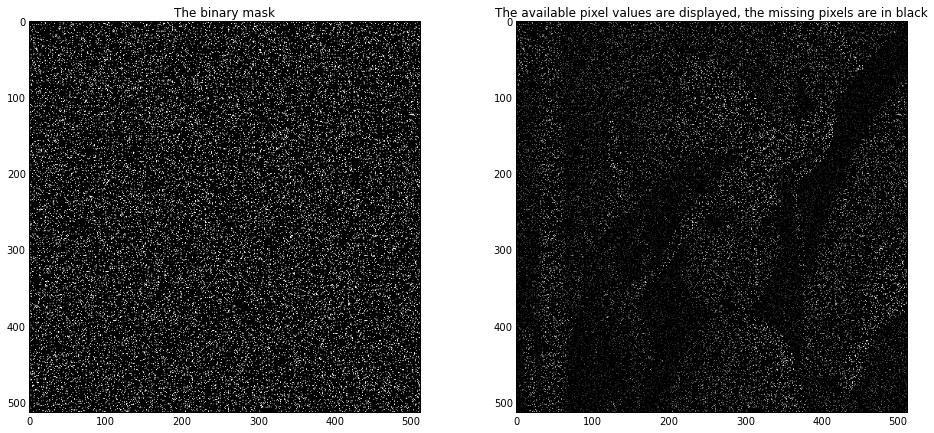

In [42]:
fig, (subfig1,subfig2) = subplots(1,2,figsize=(16,7)) # one figure with two horizontal subfigures
subfig1.imshow(mask, cmap=cm.gray)
subfig2.imshow(mask*xsharp, cmap=cm.gray)
subfig1.set_title('The binary mask')
subfig2.set_title('The available pixel values are displayed, the missing pixels are in black')

The degradation operator $A$ is simply pixelwise multiplication by the binary mask. We have $A^*=A$ and $A^*A=A$.

In [43]:
y = mask*xsharp

The problem we consider is $$\umin{x \in \Omega} f(x)\quad\equiv\quad\umin{x \in \RR^d} \frac{1}{2}\|Dx\|^2\quad\mbox{s.t.}\quad Ax=y.$$

<h3>
 <font color='magenta'>
__Exercise: write the code of the function Grad_f.__</font></h3>

In [44]:
def Grad_f(x):
    # put your code here

The Lipschitz constant $\beta$ of $\nabla f$ is 8.

In [45]:
def Proj_Omega(x, y, mask):
    x[mask] = y[mask] # parameters of functions are given by reference, so the content of x can be modified
    return x

<h3>
 <font color='magenta'>
__Exercise: write the code of the function Grad_f.__</font></h3>

In [46]:
def ProjGradDescent(Grad_f, Proj_Omega, y, mask, x0, nbiter, tau):
    # put your code here

In [47]:
tau = 1.9 / 8
nbiter = 300

In [48]:
xrestored = ProjGradDescent(Grad_f, Proj_Omega, y, mask, y, nbiter, tau)

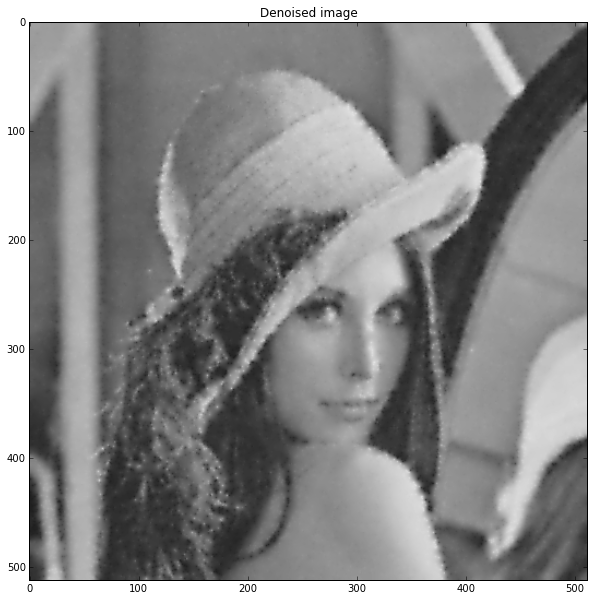

In [49]:
figsize(10,10)
imshow(xrestored, cmap=cm.gray, vmin=0, vmax=255)
title('Denoised image')